In [1]:
%matplotlib inline

In [2]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']


In [3]:
from astropy.table import Table
npts = int(1e6)
mock = Table()
magr_min, magr_max = -26, -5
mock['Mr'] = np.random.uniform(magr_min, magr_max, npts)

from cosmodc2.sdss_colors import analytical_colors
__=reload(analytical_colors)
# mock['gr'] = analytical_colors.g_minus_r(mock['Mr'])
# mock['ri'] = analytical_colors.r_minus_i(mock['Mr'])
mock['sfr_percentile'] = np.random.rand(len(mock))
mock['redshift'] = 0.0
gr, ri = analytical_colors.gr_ri_monte_carlo(
    mock['Mr'], mock['sfr_percentile'], mock['redshift'])
mock['gr'] = gr
mock['ri'] = ri

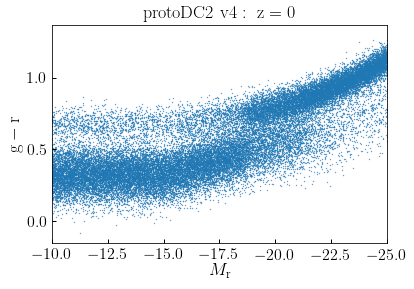

In [5]:
fig, ax = plt.subplots(1, 1)

__=ax.scatter(mock['Mr'][::20], mock['gr'][::20], s=0.1)

xlim = ax.set_xlim(-10, -25)
xlabel = ax.set_xlabel(r'$M_{\rm r}$')
ylabel = ax.set_ylabel(r'${\rm g - r}$')
title = ax.set_title(r'${\rm protoDC2\ v4:\ z = 0}$')
figname = 'gr_vs_magr_z0_pdc2v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel], bbox_inches='tight')

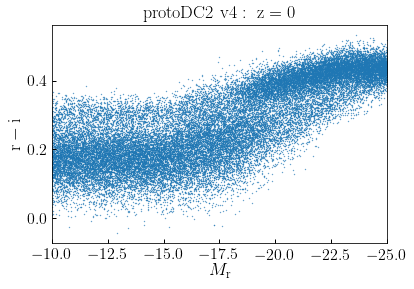

In [6]:
fig, ax = plt.subplots(1, 1)

__=ax.scatter(mock['Mr'][::20], mock['ri'][::20], s=0.1)

xlim = ax.set_xlim(-10, -25)

xlabel = ax.set_xlabel(r'$M_{\rm r}$')
ylabel = ax.set_ylabel(r'${\rm r - i}$')
title = ax.set_title(r'${\rm protoDC2\ v4:\ z=0}$')

figname = 'ri_vs_magr_z0_pdc2v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel], bbox_inches='tight')

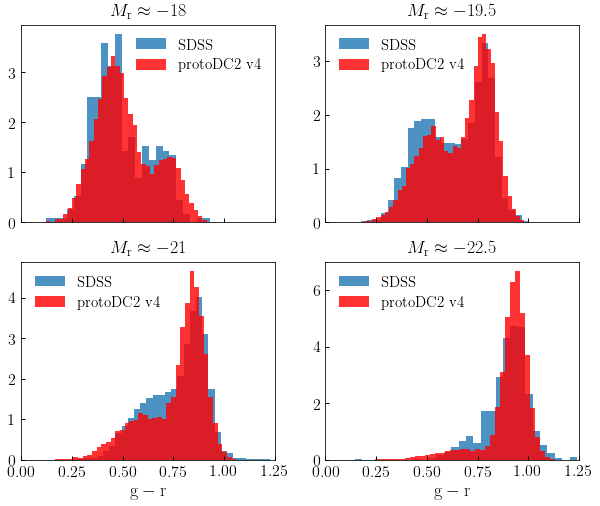

In [7]:
npts = int(1e6)

from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
__=reload(analytical_colors)

magr_max = -18.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr18 = sdss['restframe_extincted_sdss_gr'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_gr18 = mock['gr'][mock_mask]

magr_max = -19.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr19p5 = sdss['restframe_extincted_sdss_gr'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_gr19p5 = mock['gr'][mock_mask]

magr_max = -21.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr21 = sdss['restframe_extincted_sdss_gr'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_gr21 = mock['gr'][mock_mask]

magr_max = -22.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr22p5 = sdss['restframe_extincted_sdss_gr'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_gr22p5 = mock['gr'][mock_mask]


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))

((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

nbins = 40

__=ax1.hist(sdss_sample_gr18, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax1.hist(mock_sample_gr18, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax2.hist(sdss_sample_gr19p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax2.hist(mock_sample_gr19p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax3.hist(sdss_sample_gr21, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax3.hist(mock_sample_gr21, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax4.hist(sdss_sample_gr22p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax4.hist(mock_sample_gr22p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

for ax in axes:
    xlim = ax.set_xlim(0, 1.25)
    leg = ax.legend()

ax1.set_xticklabels([''])
ax2.set_xticklabels([''])
title1 = ax1.set_title(r'$M_{\rm r} \approx -18$')
title2 = ax2.set_title(r'$M_{\rm r} \approx -19.5$')
title3 = ax3.set_title(r'$M_{\rm r} \approx -21$')
title4 = ax4.set_title(r'$M_{\rm r} \approx -22.5$')
xlabel3 = ax3.set_xlabel(r'${\rm g-r}$')
xlabel4 = ax4.set_xlabel(r'${\rm g-r}$')

figname = 'sdss_gr_distribution_vs_pdc2v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

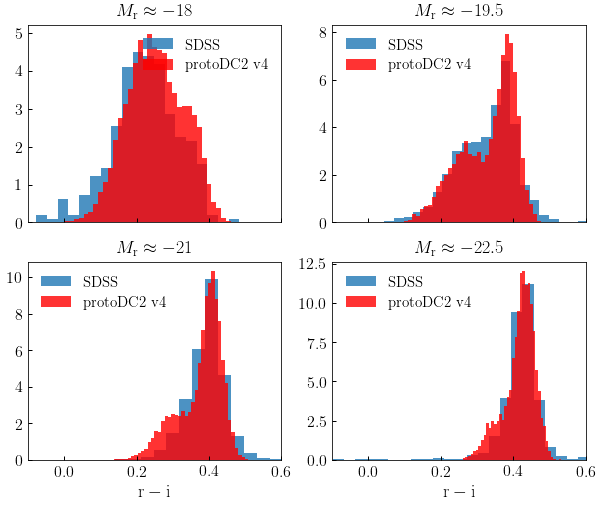

In [8]:
npts = int(1e6)

from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
__=reload(analytical_colors)


magr_max = -18.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri18 = sdss['restframe_extincted_sdss_ri'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_ri18 = mock['ri'][mock_mask]

magr_max = -19.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri19p5 = sdss['restframe_extincted_sdss_ri'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_ri19p5 = mock['ri'][mock_mask]

magr_max = -21.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri21 = sdss['restframe_extincted_sdss_ri'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_ri21 = mock['ri'][mock_mask]

magr_max = -22.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri22p5 = sdss['restframe_extincted_sdss_ri'][mask]
mock_mask = (mock['Mr'] < magr_max) & (mock['Mr'] > magr_min)
mock_sample_ri22p5 = mock['ri'][mock_mask]


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))

((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

nbins = 40

__=ax1.hist(sdss_sample_ri18, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax1.hist(mock_sample_ri18, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax2.hist(sdss_sample_ri19p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax2.hist(mock_sample_ri19p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax3.hist(sdss_sample_ri21, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax3.hist(mock_sample_ri21, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax4.hist(sdss_sample_ri22p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax4.hist(mock_sample_ri22p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

for ax in axes:
    xlim = ax.set_xlim(-0.1, 0.6)
    leg = ax.legend()

ax1.set_xticklabels([''])
ax2.set_xticklabels([''])
title1 = ax1.set_title(r'$M_{\rm r} \approx -18$')
title2 = ax2.set_title(r'$M_{\rm r} \approx -19.5$')
title3 = ax3.set_title(r'$M_{\rm r} \approx -21$')
title4 = ax4.set_title(r'$M_{\rm r} \approx -22.5$')
xlabel3 = ax3.set_xlabel(r'${\rm r-i}$')
xlabel4 = ax4.set_xlabel(r'${\rm r-i}$')

figname = 'sdss_ri_distribution_vs_pdc2v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

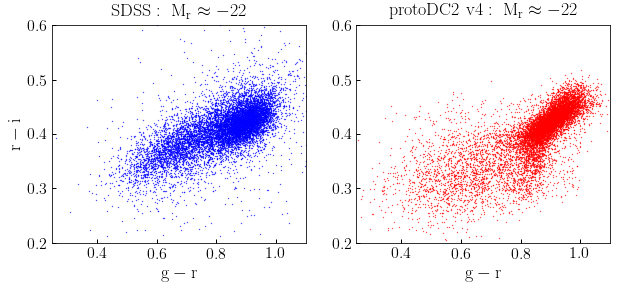

In [9]:
faint, bright = -21.5, -22.5

mask = (mock['Mr'] < faint) & (mock['Mr'] > bright)
from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
sdss_mask = retrieve_sdss_sample_mask(sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], 
                          bright, faint)


num_sdss_sample = np.count_nonzero(sdss_mask)
num_mock_sample = np.count_nonzero(mask)
num_to_plot = int(min(num_sdss_sample, num_mock_sample)/2)

sdss_indices = np.random.choice(np.arange(num_sdss_sample), num_to_plot, replace=False)
sdss_sample_gr = sdss['restframe_extincted_sdss_gr'][sdss_mask][sdss_indices.astype(int)]
sdss_sample_ri = sdss['restframe_extincted_sdss_ri'][sdss_mask][sdss_indices.astype(int)]

mock_indices = np.random.choice(np.arange(num_mock_sample), num_to_plot, replace=False)
mock_sample_gr = mock['gr'][mask][mock_indices.astype(int)]
mock_sample_ri = mock['ri'][mask][mock_indices.astype(int)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

__=ax1.scatter(sdss_sample_gr, sdss_sample_ri, s=0.1, color='blue')
__=ax2.scatter(mock_sample_gr, mock_sample_ri, s=0.1, color='red')


xlim = ax1.set_xlim(0.25, 1.1)
ylim = ax1.set_ylim(0.2, 0.6)
xlim = ax2.set_xlim(0.25, 1.1)
ylim = ax2.set_ylim(0.2, 0.6)

xlabel = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm g-r}$')
ylabel = ax1.set_ylabel(r'${\rm r-i}$')
title1 = ax1.set_title(r'${\rm SDSS:\ M_r \approx -22}$')
title2 = ax2.set_title(r'${\rm protoDC2\ v4:\ M_r \approx -22}$')

figname = 'sdss_gr_ri_vs_magr22.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

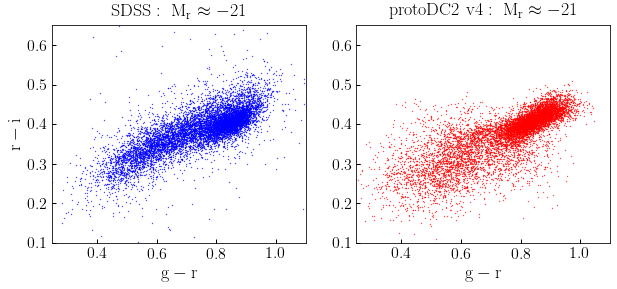

In [10]:
faint, bright = -20.5, -21.5

mask = (mock['Mr'] < faint) & (mock['Mr'] > bright)
from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
sdss_mask = retrieve_sdss_sample_mask(sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], 
                          bright, faint)


num_sdss_sample = np.count_nonzero(sdss_mask)
num_mock_sample = np.count_nonzero(mask)
num_to_plot = int(min(num_sdss_sample, num_mock_sample)/3)

sdss_indices = np.random.choice(np.arange(num_sdss_sample), num_to_plot, replace=False)
sdss_sample_gr = sdss['restframe_extincted_sdss_gr'][sdss_mask][sdss_indices.astype(int)]
sdss_sample_ri = sdss['restframe_extincted_sdss_ri'][sdss_mask][sdss_indices.astype(int)]

mock_indices = np.random.choice(np.arange(num_mock_sample), num_to_plot, replace=False)
mock_sample_gr = mock['gr'][mask][mock_indices.astype(int)]
mock_sample_ri = mock['ri'][mask][mock_indices.astype(int)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

__=ax1.scatter(sdss_sample_gr, sdss_sample_ri, s=0.1, color='blue')
__=ax2.scatter(mock_sample_gr, mock_sample_ri, s=0.1, color='red')


xlim = ax1.set_xlim(0.25, 1.1)
ylim = ax1.set_ylim(0.1, 0.65)
xlim = ax2.set_xlim(0.25, 1.1)
ylim = ax2.set_ylim(0.1, 0.65)

xlabel = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm g-r}$')
ylabel = ax1.set_ylabel(r'${\rm r-i}$')
title1 = ax1.set_title(r'${\rm SDSS:\ M_r \approx -21}$')
title2 = ax2.set_title(r'${\rm protoDC2\ v4:\ M_r \approx -21}$')

figname = 'sdss_gr_ri_vs_magr21.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

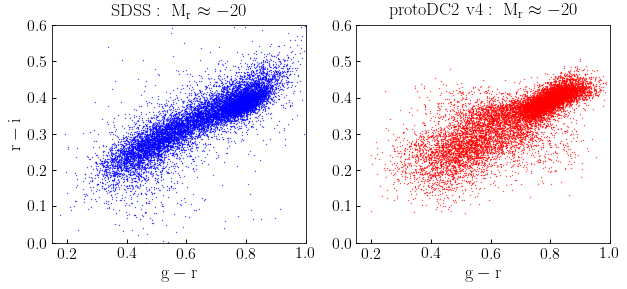

In [11]:
faint, bright = -19.5, -20.5

mask = (mock['Mr'] < faint) & (mock['Mr'] > bright)
from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
sdss_mask = retrieve_sdss_sample_mask(sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], 
                          bright, faint)


num_sdss_sample = np.count_nonzero(sdss_mask)
num_mock_sample = np.count_nonzero(mask)
num_to_plot = min(num_sdss_sample, num_mock_sample)

sdss_indices = np.random.choice(np.arange(num_sdss_sample), num_to_plot, replace=False)
sdss_sample_gr = sdss['restframe_extincted_sdss_gr'][sdss_mask][sdss_indices.astype(int)]
sdss_sample_ri = sdss['restframe_extincted_sdss_ri'][sdss_mask][sdss_indices.astype(int)]

mock_indices = np.random.choice(np.arange(num_mock_sample), num_to_plot, replace=False)
mock_sample_gr = mock['gr'][mask][mock_indices.astype(int)]
mock_sample_ri = mock['ri'][mask][mock_indices.astype(int)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

__=ax1.scatter(sdss_sample_gr, sdss_sample_ri, s=0.1, color='blue')
__=ax2.scatter(mock_sample_gr, mock_sample_ri, s=0.1, color='red')


xlim = ax1.set_xlim(0.15, 1.)
ylim = ax1.set_ylim(0., 0.6)
xlim = ax2.set_xlim(0.15, 1.)
ylim = ax2.set_ylim(0., 0.6)

xlabel = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm g-r}$')
ylabel = ax1.set_ylabel(r'${\rm r-i}$')
title1 = ax1.set_title(r'${\rm SDSS:\ M_r \approx -20}$')
title2 = ax2.set_title(r'${\rm protoDC2\ v4:\ M_r \approx -20}$')

figname = 'sdss_gr_ri_vs_magr20.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

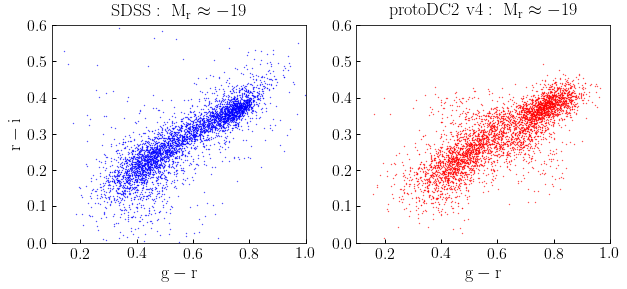

In [12]:
faint, bright = -18.5, -19.5

mask = (mock['Mr'] < faint) & (mock['Mr'] > bright)
from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
sdss_mask = retrieve_sdss_sample_mask(sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], 
                          bright, faint)


num_sdss_sample = np.count_nonzero(sdss_mask)
num_mock_sample = np.count_nonzero(mask)
num_to_plot = min(num_sdss_sample, num_mock_sample)

sdss_indices = np.random.choice(np.arange(num_sdss_sample), num_to_plot, replace=False)
sdss_sample_gr = sdss['restframe_extincted_sdss_gr'][sdss_mask][sdss_indices.astype(int)]
sdss_sample_ri = sdss['restframe_extincted_sdss_ri'][sdss_mask][sdss_indices.astype(int)]

mock_indices = np.random.choice(np.arange(num_mock_sample), num_to_plot, replace=False)
mock_sample_gr = mock['gr'][mask][mock_indices.astype(int)]
mock_sample_ri = mock['ri'][mask][mock_indices.astype(int)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

__=ax1.scatter(sdss_sample_gr, sdss_sample_ri, s=0.1, color='blue')
__=ax2.scatter(mock_sample_gr, mock_sample_ri, s=0.1, color='red')


xlim = ax1.set_xlim(0.1, 1.)
ylim = ax1.set_ylim(0., 0.6)
xlim = ax2.set_xlim(0.1, 1.)
ylim = ax2.set_ylim(0., 0.6)

xlabel = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm g-r}$')
ylabel = ax1.set_ylabel(r'${\rm r-i}$')
title1 = ax1.set_title(r'${\rm SDSS:\ M_r \approx -19}$')
title2 = ax2.set_title(r'${\rm protoDC2\ v4:\ M_r \approx -19}$')

figname = 'sdss_gr_ri_vs_magr19.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

In [13]:
# __=reload(analytical_colors)

# xmin, xmax = -30, -10
# mrtest = np.linspace(xmin, xmax, 1000)

# blue_peak_gr = analytical_colors.main_sequence_peak_gr(mrtest)
# red_peak_gr = analytical_colors.red_sequence_peak_gr(mrtest)
# blue_peak_ri = analytical_colors.main_sequence_peak_ri(mrtest)
# red_peak_ri = analytical_colors.red_sequence_peak_ri(mrtest)

# fig, ax = plt.subplots(1, 1)

# __=ax.plot(mrtest, blue_peak_gr, color='blue')
# __=ax.plot(mrtest, red_peak_gr, color='red')
# __=ax.plot(mrtest, blue_peak_ri, '--', color='blue')
# __=ax.plot(mrtest, red_peak_ri, '--', color='red')

# xlim = ax.set_xlim(xmax, xmin)